In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [3]:
#parameter setting
amp = 1        #range[0.0, 1.0]
sr = 10000     #sampling rate, Hz
dur = 0.5      #in seconds
freq = 100.0   #sine frequency, Hz

In [6]:
#generating time
t1 = np.arange(1, sr)
t2 = np.arange(1, sr+1)/sr
t3 = np.arange(1, sr*0.5)/sr
t4 = np.arange(1, sr*0.5+1)/sr
t = np.arange(1, sr*dur+1)/sr

len(t)

5000

(1, sr) : vector 값
1) (1, sr) : 1 부터 sr-1인 9999까지
2) (1, sr+1)/sr : 1/10000 부터 1까지
3) (1, sr*0.5)/sr : 1/10000 부터 4999/10000까지
4) (1, sr*0.5+1)/sr : 1/10000 부터 5000/10000까지
5) 0.5를 dur로 바꿔준 것 뿐
-> 우리는 이렇게 시간을 만들 수 있다

Q. 만약의 t의 길이를 알 수 있으려면?
len(t)를 사용
근데, len(t)를 쓰지 않고도 답이 5000인걸 알아야 한다

In [14]:
# generate phase
amp1 = 1 #range [1.1,1.0]
sr1 = 10000 #sampling rate, Hz -> 일초에 몇 번
dur1 = 1 #in seconds
freq1 = 1.0 #sine frequency, Hz


theta = t * 2*np.pi *freq
len(theta)

5000

이 단계가 가장 중요한 단계

1) 시간은 각도가 아니기에 sin이 받을 수 없다. 그럼 시간이랑 각도가 어떠한 관계인가? 어떻게 바꿔줄까? 그건 freq를 사용하면 바꿀 수 있다.

2) 위에 보면, freq1 = 1 이란 의미는 주기가 1

3) theta = t*2*np.pi
-> 0보다 조금 큰 값에서 2파이까지, 근데 그걸 10000개로 쪼갠 것
freq를 정의함으로 시간과 각도를 합치는 순간,,,,

만약 freq가 2이면, 0부터 4파이까지 i.e. 두 바퀴 돈다

4) 하는 방법은 time을 먼저 만들고 time에다가 freq랑 2*np.pi를 곱하면 된다. 그리고 theta를 vector값으로 만든다.

*np.pi 대신에 import math 해주고 math.pi해도 값 계산.

Q. t와 theta의 길이는 같을까? ㅇㅇ

In [15]:
# generate signal by cosine-phasor
s = np.sin(theta)
len(s)

5000

1) s의 size는 5000개 (앞의 t와 theta의 size가 모두 동일)

2) sin이라는 함수를 사용할 것. 이건 우리가 만드는 게 아니고 np에 있는 sin 함수를 사용

3) sin안에 어떤 값이 들어갈까? 시간? 온도? -> 각도를 받아야 한다. 의미있게 출력하려면 각도 값을 넣어야한다.
-> 각도 :  degree & radian
sin에 radian 값을 넣어야 한다.

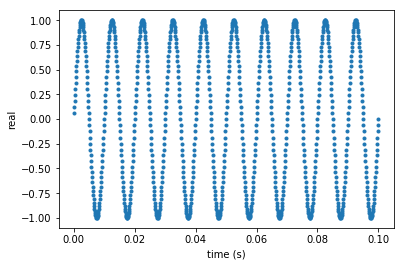

In [16]:
fig = plt.figure() 
#plot을 그리는 방법인데, 이 코드를 적어라! 이건 시험에 안나옴
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

ipd.Audio(s, rate = sr)

1. x축 자체가 시간 축이 기준이 되어야 진행 가능

2. ax.plot(t[0:1000], s[0:1000], '.') -> 이 부분이 중요

3. 잘 보면 plot을 만들 때 theta를 사용하지 않음
ax.plot(t,s)
wave를 보면 x축이 time이여서 각도가 들어갈 이유가 1도 없지

4. 표를 보면 점으로 이루어져있는데 ,그럼 점이 몇 개일까? 라고 질문 가능하겠지? 그럼 위에 갯수랑 같지!

5. time, s(sin 값)
우리가 총 만 개의 value를 만들었는데, 그럼 100번째의 시간과 각도를 알 수 있다. 이러한 방식으로 전체를 다 이해할 줄 알아야 하고, 이해하고 있어야 한다.

6. ax.plot(t[0:1000], s[0:1000], '.')
 1) t[0:1000]
 2) s[0:1000]
-> 우리가 만 개로 쪼갰는데, 만 개를 다 그리면 너무 많으니까 1000개까지로 한정
 3) '.'
-> 점 모양으로 찍는다

7. ax.set_xlabel('time (s)') / ax.set_ylabel('real')
x축에는 time (s), y축에는 real이라는 이름을 붙여준 것

8. ipd.Audio(s, rate = sr)
소리 play 할 수 있는 값이 출력
freq가 1이면 절대 들리지 않고, 100이여도 들리기 힘들다,,

In [ ]:
# generate signal by complex-phasor
c = np.exp(thata*1j)

여기서 np대신 exp로 바꾸고 theta에 *1j
이 부분은 설명이 필요!